In [5]:
import pandas as pd
dataset=pd.read_csv("./data.csv")

dataset

,docno,doclen,text
0,LA122989-0001,50,the citi compton ask peopl donat book given hi...
1,LA122989-0002,400,sure traffic pace life gener becom hectic luck...
2,LA122989-0005,32,leona helmsley correct said onli littl peopl p...
3,LA122989-0006,87,your editori dec 14 remark upon result studi i...
4,LA122989-0007,431,soviet presid mikhail s gorbachev day away sev...
...,...,...,...
57509,FT911-3689,16,hundr romanian riot polic arm baton shield sto...
57510,FT911-3690,25,in earli edit financi time april 13 pictur mr ...
57511,FT911-3691,367,few issu quit controversi govern privatis prog...
57512,FT911-3692,375,uk stock suffer anoth sharp revers yesterday f...


In [129]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')

count=0
sid = SentimentIntensityAnalyzer()
neg_results=[]
pos_results=[]
neu_results=[]
compunds=[]




for i in range(0,len(dataset)):
     #print(dataset.iloc[i]["docno"])
     ss = sid.polarity_scores(dataset.iloc[i]["text"])
     neg_results.append(ss["neg"])
     pos_results.append(ss["pos"])
     neu_results.append(ss["neu"])
     compunds.append(ss["compound"])

dataset["neg"]=neg_results
dataset["pos"]=pos_results


dataset["neu"]=neu_results


dataset["compund"]=compunds

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dipteshmukherjee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [130]:
def f(row):
    if row['compund']>=0.95:
        val = 1
    elif row['compund']<=-0.95:
        val = -1
    else:
        val = 0
    return val

In [133]:
dataset['class'] = dataset.apply(f, axis=1)
positive_docs=dataset[dataset['compund']>0.95 ]
neg_docs=dataset[dataset['compund']<-0.95  ]
positive_docs=positive_docs[['docno','compund','class']]
positive_docs

,docno,compund,class
8,LA122989-0011,0.9967,1
9,LA122989-0012,0.9951,1
13,LA122989-0018,0.9992,1
14,LA122989-0019,0.9937,1
15,LA122989-0021,0.9578,1
...,...,...,...
57475,FT911-3655,0.9856,1
57476,FT911-3656,0.9571,1
57489,FT911-3669,0.9610,1
57499,FT911-3679,0.9501,1


In [135]:
pos_docs=dataset[dataset['class']==1]
pos_docs

,docno,doclen,text,neg,pos,neu,compund,class
8,LA122989-0011,535,those look insight tonight holiday bowl game b...,0.043,0.168,0.789,0.9967,1
9,LA122989-0012,670,fourteen minut thursday night texaco star tour...,0.061,0.134,0.805,0.9951,1
13,LA122989-0018,1693,the 1980 rememb major turn point danc san dieg...,0.033,0.108,0.859,0.9992,1
14,LA122989-0019,374,contrari popular opinion andrew lloyd webber i...,0.035,0.151,0.813,0.9937,1
15,LA122989-0021,175,moniqu loui aldebert perman loan franc past tw...,0.023,0.133,0.844,0.9578,1
...,...,...,...,...,...,...,...,...
57475,FT911-3655,309,the european commiss use everi legal weapon di...,0.051,0.145,0.804,0.9856,1
57476,FT911-3656,232,franc pois becom romania lead foreign investor...,0.013,0.088,0.899,0.9571,1
57489,FT911-3669,270,bulgaria law privatis properti right place aut...,0.053,0.111,0.835,0.9610,1
57499,FT911-3679,177,accord figur releas bank finland total soviet ...,0.091,0.171,0.738,0.9501,1


In [136]:


neu_docs=dataset[dataset['class']==0]
neu_docs

,docno,doclen,text,neg,pos,neu,compund,class
0,LA122989-0001,50,the citi compton ask peopl donat book given hi...,0.041,0.066,0.893,0.3182,0
1,LA122989-0002,400,sure traffic pace life gener becom hectic luck...,0.052,0.093,0.855,0.9260,0
2,LA122989-0005,32,leona helmsley correct said onli littl peopl p...,0.167,0.000,0.833,-0.5574,0
3,LA122989-0006,87,your editori dec 14 remark upon result studi i...,0.072,0.000,0.928,-0.6597,0
4,LA122989-0007,431,soviet presid mikhail s gorbachev day away sev...,0.097,0.058,0.845,-0.9465,0
...,...,...,...,...,...,...,...,...
57508,FT911-3688,25,the irish republican armi offer stop kill loya...,0.283,0.111,0.605,-0.6597,0
57509,FT911-3689,16,hundr romanian riot polic arm baton shield sto...,0.194,0.000,0.806,-0.5574,0
57510,FT911-3690,25,in earli edit financi time april 13 pictur mr ...,0.000,0.000,1.000,0.0000,0
57511,FT911-3691,367,few issu quit controversi govern privatis prog...,0.116,0.141,0.743,0.8781,0


In [137]:
neg_docs=dataset[dataset['class']==-1]
neg_docs

,docno,doclen,text,neg,pos,neu,compund,class
30,LA122989-0036,150,an el cajon man fatal shot attempt attack exwi...,0.218,0.000,0.782,-0.9883,-1
31,LA122989-0038,282,skeptic polic conclus son death accid griev fa...,0.275,0.015,0.709,-0.9983,-1
32,LA122989-0039,325,a coron autopsi releas thursday found death co...,0.191,0.038,0.770,-0.9964,-1
36,LA122989-0043,89,a 9yearold boy kill car drive wrong way arleta...,0.211,0.000,0.789,-0.9670,-1
39,LA122989-0046,1171,far beneath modern metropoli power forc natur ...,0.120,0.099,0.780,-0.9871,-1
...,...,...,...,...,...,...,...,...
57285,FT911-3465,198,oil price fell sharpli yesterday rise almost d...,0.115,0.019,0.866,-0.9531,-1
57312,FT911-3492,229,britain current account deficit widen last mon...,0.154,0.049,0.798,-0.9723,-1
57355,FT911-3535,516,almost everi citi north america feel threeway ...,0.107,0.047,0.846,-0.9839,-1
57393,FT911-3573,111,norway overtak britain europ biggest crude oil...,0.139,0.000,0.861,-0.9524,-1


In [138]:
#For positive documents 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100, strip_accents='unicode', analyzer='word',  lowercase=True, use_idf=True)

t = pos_docs['text']

tfs = tfidf.fit_transform(pos_docs['text'])

response = tfidf.transform(pos_docs['text'])
feature_names = tfidf.get_feature_names()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(response.toarray()).flatten()[::-1]

n = 100
top_n = feature_array[tfidf_sorting][:n]
print(top_n)

['pound' 'share' 'bank' 'trade' 'price' 'compani' 'said' 'profit' 'cent'
 'hous' 'market' 'per' 'the' 'dollar' 'new' 'mr' 'week' 'there' 'year'
 'manag' 'day' 'one' 'industri' 'would' 'chang' 'high' 'point' 'they'
 'look' 'group' 'end' 'made' 'even' 'last' 'time' 'also' 'it' 'product'
 'citi' 'govern' 'show' 'call' 'expect' 'and' 'gener' 'month' 'interest'
 'howev' 'still' 'may' 'includ' 'three' 'come' 'much' 'good' 'well'
 'could' 'first' 'like' 'way' 'plan' 'run' 'us' 'use' 'want' 'develop'
 'back' 'world' 'work' 'countri' 'busi' 'but' 'we' 'say' 'game' 'play'
 'need' 'peopl' 'school' 'get' 'sinc' 'start' 'state' 'mani' 'make' 'take'
 'team' 'that' 'season' 'invest' 'thi' 'in' 'if' 'rate' 'help' 'he' 'two'
 'nation' 'go' 'think']


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [139]:
#For negative documents 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100, strip_accents='unicode', analyzer='word',  lowercase=True, use_idf=True)



tfs = tfidf.fit_transform(neg_docs['text'])

response = tfidf.transform(neg_docs['text'])
feature_names = tfidf.get_feature_names()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(response.toarray()).flatten()[::-1]

n = 100
top_n1 = feature_array[tfidf_sorting][:n]
print(top_n1)

['world' 'includ' 'like' 'war' 'come' 'even' 'mani' 'the' 'say' 'peopl'
 'home' 'still' 'way' 'it' 'back' 'call' 'year' 'us' 'last' 'live'
 'member' 'told' 'get' 'made' 'there' 'we' 'go' 'take' 'use' 'first' 'new'
 'he' 'said' 'but' 'in' 'would' 'car' 'compani' 'court' 'polit' 'case'
 'want' 'end' 'polic' 'they' 'anoth' 'work' 'forc' 'kill' 'may' 'make'
 'week' 'day' 'could' 'also' 'lo' 'presid' 'countri' 'counti' 'public'
 'report' 'san' 'citi' 'charg' 'cent' 'school' 'sever' 'sinc' 'state'
 'bank' 'time' 'area' 'three' 'angel' 'and' 'american' 'problem' 'death'
 'two' 'depart' 'man' 'militari' 'unit' 'investig' 'month' 'mr' 'hous'
 'much' 'nation' 'group' 'govern' 'offic' 'offici' 'found' 'one' 'tri'
 'fire' 'per' 'plan' 'thi']


In [44]:
#print(top_n)
top_n1

array(['govern', 'bank', 'cent', 'per', 'mr', 'said', 'the', 'year',
       'cut', 'countri', 'sever', 'nation', 'call', 'report', 'state',
       'new', 'also', 'they', 'way', 'death', 'depart', 'dollar', 'end',
       'even', 'fire', 'first', 'forc', 'gener', 'get', 'go', 'war',
       'group', 'he', 'home', 'hous', 'in', 'day', 'court', 'investig',
       'we', 'american', 'angel', 'anoth', 'area', 'back', 'world', 'but',
       'work', 'car', 'case', 'week', 'charg', 'citi', 'come', 'compani',
       'could', 'counti', 'includ', 'it', 'there', 'unit', 'point',
       'polic', 'polit', 'pound', 'presid', 'problem', 'public', 'two',
       'told', 'san', 'say', 'time', 'sinc', 'three', 'still', 'take',
       'thi', 'plan', 'peopl', 'kill', 'one', 'last', 'like', 'lo',
       'made', 'make', 'mani', 'would', 'may', 'member', 'militari',
       'month', 'want', 'much', 'use', 'us', 'offic', 'offici', 'market'],
      dtype='<U8')

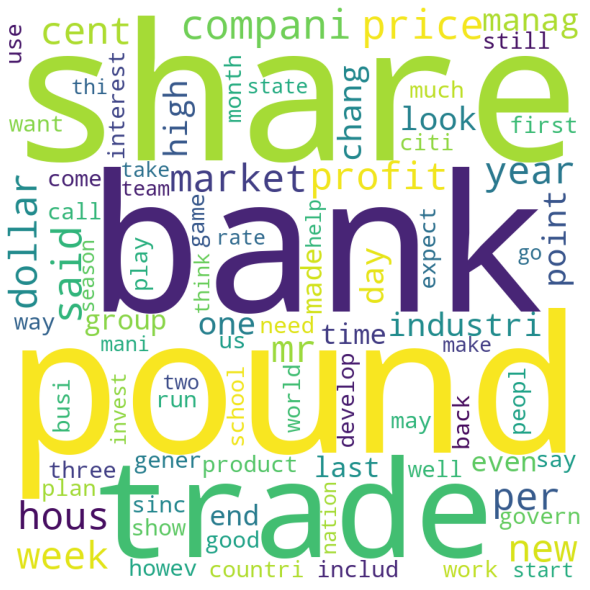

In [140]:
#For positive documents
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = top_n
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [48]:
pip install wordcloud

     |████████████████████████████████| 220 kB 3.4 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-macosx_10_9_x86_64.whl size=154046 sha256=76370ab057ff25333c02ce5d8c33bfd9c04579ad1c6cf81e70184606d5e5e804
  Stored in directory: /Users/dipteshmukherjee/Library/Caches/pip/wheels/f9/7a/dd/06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


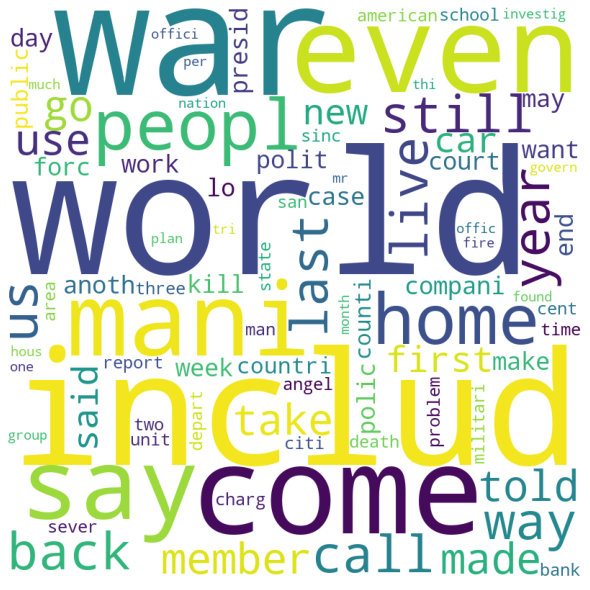

In [141]:
#For negative documents 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
df = top_n1
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = top_n1
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()